In [1]:
#importing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('Language Detection.csv')
print("tail:\n",dataset.tail())
print("head:\n",dataset.head())
print("sample:\n",dataset.sample(5))

tail:
                                                     Text Language
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada
head:
                                                 Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
sample:
                                                    Text  Language
7831  Bazı ansiklopediler de Vikipedi gibi Viki yazı...   Turkish
1040  there's too much on my plate i'm drowning in w...   English
4366  In ve

In [3]:
df = dataset.copy()
df.sample(5)

,Text,Language
6167,Википедия в настоящее время работает на выделе...,Russian
3036,você pode fazer isso se alguém está indo muito...,Portugeese
5995,— «Природа») — один из самых старых и авторите...,Russian
7374,Questa definizione di Mitchell è rilevante poi...,Italian
8207,teklifler yapmak.,Turkish


In [4]:
df.shape

(10337, 2)

In [5]:
#value count
df['Language'].value_counts(sort=True)

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [6]:
df['Language'].value_counts(sort=True).values

array([1385, 1014,  819,  739,  698,  692,  676,  594,  546,  536,  474,
        470,  469,  428,  369,  365,   63], dtype=int64)

In [7]:
#null value check
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
#identifying unique elements
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

<BarContainer object of 17 artists>

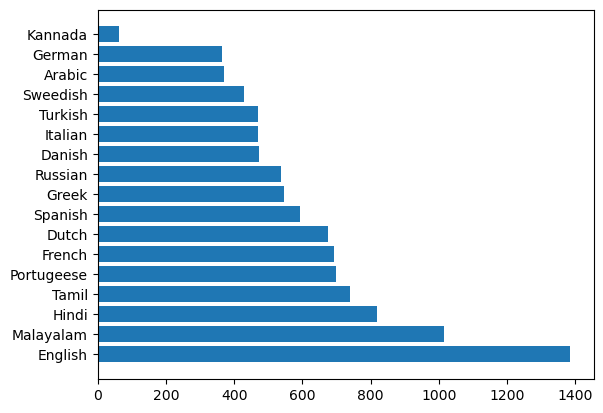

In [9]:
#plotting a bar plot for unique elements and count
plt.barh(df['Language'].unique(), df['Language'].value_counts(sort=True).values)

In [10]:
#train test split:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test =train_test_split(df['Text'].values,df['Language'].values,test_size=0.2,random_state=42)

In [12]:
print("x_train:\n",X_train[:2],"\nx_test:\n",X_test[:2],"\ny_train:\n",y_train[:2],"\ny_test:\n",y_test[:2])

x_train:
 ['τώρα αργότερα η Μέλι και ο Τέρι έσπασαν αντίο στον παλιό τους φίλο και πήγαν να χαμογελούν ο ένας στον άλλο κρυφά εκείνο το βράδυ, τόσο μητέρα όσο και κόρη.'
 'Améliorez-le ou discutez-en.'] 
x_test:
 ['И с этими словами она села в его карету, и, даже не попрощавшись с матерью, уехала с ангелом, пока они ехали, карета внезапно вошла в волшебный портал, где она путешествовала по бурной местности, карета сильно ударилась и нарцисса.'
 'Sistemi di tipo probabilistico erano invasi di problemi sia teoretici sia pratici in termini di acquisizione e rappresentazione dei dati[10].'] 
y_train:
 ['Greek' 'French'] 
y_test:
 ['Russian' 'Italian']


In [13]:
#Using Bag of words on text
#CountVectorizer:used for converting a collection of text documents into a matrix of token counts
bag=CountVectorizer()
bag.fit(X_train)
X_train_encoded = bag.transform(X_train)
X_test_encoded = bag.transform(X_test)

In [14]:
#label encoding:
le=LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [15]:
#to convert categorical labels into numerical values
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

In [16]:
y_train_encoded, y_test_encoded

(array([ 6,  4,  8, ..., 13,  3,  8]), array([12,  8,  3, ...,  2,  6,  4]))

In [17]:
set(y_train_encoded)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [18]:
# fitting the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_encoded, y_train_encoded)

MultinomialNB()

In [19]:
y_preds = model.predict(X_test_encoded)
y_preds

array([12,  8,  3, ...,  2,  6,  4])

In [20]:
def accuracy(y_test, y_preds):
    return{"Accuracy": [sum(y_preds==y_test)/len(y_preds)*100]}

In [21]:
acc = accuracy(y_test_encoded, y_preds)
acc

{'Accuracy': [98.25918762088975]}

In [22]:
#example:
# Preprocess new data
new_data = ["potresti dirmi cosa significa questa parola?", 
            "Une étude montre que ces articles diffèrent se",
            " Nature, in the broadest sense, is the natural..."]

# Use the same CountVectorizer instance to transform new data
X_new_encoded = bag.transform(new_data)

# Predict the language
y_new_preds = model.predict(X_new_encoded)

# Decode the language labels
y_new_labels = le.inverse_transform(y_new_preds)

# Print the predicted languages
for i, label in enumerate(y_new_labels):
    print(f"Text {i+1}: {label}")

Text 1: Italian
Text 2: French
Text 3: English
